In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardataset/data.csv


In [2]:
#necessary imports
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score

# Car Prices Analysis & MSRP Prediction 

# EDA Phase

In [3]:
cars = pd.read_csv("/kaggle/input/cardataset/data.csv")
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


The majority of cars in the table are of type chevrolet.

In [4]:
cars['Make'].value_counts().sort_values(ascending = False).to_frame().reset_index().head(20)

,index,Make
0,Chevrolet,1123
1,Ford,881
2,Volkswagen,809
3,Toyota,746
4,Dodge,626
5,Nissan,558
6,GMC,515
7,Honda,449
8,Mazda,423
9,Cadillac,397


The majority of cars have the Sedan style, which is understandable as the majority of cars that are sold in the market are of type sedan.

In [5]:
cars['Vehicle Style'].value_counts().sort_values(ascending = False).to_frame().reset_index().head(20)

,index,Vehicle Style
0,Sedan,3048
1,4dr SUV,2488
2,Coupe,1211
3,Convertible,793
4,4dr Hatchback,702
5,Crew Cab Pickup,681
6,Extended Cab Pickup,623
7,Wagon,592
8,2dr Hatchback,506
9,Passenger Minivan,417


The majority of cars appear to be Compact in their respective categories.

In [6]:
cars['Vehicle Size'].value_counts().sort_values(ascending = False).to_frame().reset_index()

,index,Vehicle Size
0,Compact,4764
1,Midsize,4373
2,Large,2777


In [7]:
cars[['Vehicle Style', 'Vehicle Size', 'MSRP']].groupby(['Vehicle Style', 'Vehicle Size']).agg(len)

MSRP
Vehicle Style       Vehicle Size      
2dr Hatchback       Compact        497
                    Midsize          9
2dr SUV             Compact         89
                    Midsize         49
4dr Hatchback       Compact        623
                    Large           10
                    Midsize         69
4dr SUV             Compact        534
                    Large          501
                    Midsize       1453
Cargo Minivan       Compact         41
                    Large           15
                    Midsize         15
Cargo Van           Compact         10
                    Large           34
                    Midsize         51
Convertible         Compact        587
                    Large           14
                    Midsize        192
Convertible SUV     Compact         26
                    Midsize          3
Coupe               Compact        679
                    Large          112
                    Midsize        420
Crew Cab Pickup     Compact        258
                    Large          423
Extended Cab Pickup Compact        292
                    Large          331
Passenger Minivan   Compact         99
                    Large          116
                    Midsize        202
Passenger Van       Compact          7
                    Large           37
                    Midsize         84
Regular Cab Pickup  Compact        125
                    Large          267
Sedan               Compact        625
                    Large          813
                    Midsize       1610
Wagon               Compact        272
                    Large          104
                    Midsize        216

For each and every one of the unique vehicle styles, the msrp for compact vehicles appears to be consistently lower than the msrp for large and midsize veicles.

In [8]:
cars[['Vehicle Style', 'Vehicle Size', 'MSRP']].groupby(['Vehicle Style', 'Vehicle Size']).agg(np.mean)

MSRP
Vehicle Style       Vehicle Size               
2dr Hatchback       Compact        16844.181087
                    Midsize        18167.222222
2dr SUV             Compact         9977.786517
                    Midsize        10364.755102
4dr Hatchback       Compact        20892.691814
                    Large          65740.000000
                    Midsize        29940.594203
4dr SUV             Compact        27389.237828
                    Large          60104.259481
                    Midsize        38425.003441
Cargo Minivan       Compact        21160.365854
                    Large          23627.666667
                    Midsize        17560.000000
Cargo Van           Compact         7213.300000
                    Large          18589.235294
                    Midsize        14655.960784
Convertible         Compact        66461.557070
                    Large         486984.642857
                    Midsize       109162.182292
Convertible SUV     Compact        14393.269231
                    Midsize        43691.666667
Coupe               Compact        77030.000000
                    Large         109553.491071
                    Midsize        66103.230952
Crew Cab Pickup     Compact        29515.581395
                    Large          41919.900709
Extended Cab Pickup Compact        19275.791096
                    Large          25323.193353
Passenger Minivan   Compact        18682.151515
                    Large          26710.146552
                    Midsize        28396.376238
Passenger Van       Compact         7573.714286
                    Large          35768.108108
                    Midsize        27827.500000
Regular Cab Pickup  Compact         9878.576000
                    Large          18797.872659
Sedan               Compact        18639.049600
                    Large          74196.180812
                    Midsize        29643.578261
Wagon               Compact        21049.841912
                    Large          28208.096154
                    Midsize        29958.800926

## Visualization Pipeline

In [9]:
def visualization_pipeline(group_col, agg_col, aggregator):
    #Group by Vehicle Size and aggregate my mean to obtain the msrp for each vehicle size
    segment_msrp = cars[[group_col, agg_col]].groupby(group_col, as_index = False).agg(aggregator)
    segment_msrp = segment_msrp.sort_values(agg_col, ascending = False)

    #Get the count of vehicles that fall under each Vehicle Size category
    count = cars[group_col].value_counts().to_frame().reset_index()
    count = count.rename(columns = {'index': group_col, group_col: 'Count'})

    #Merge the tables on vehicle size category
    segment_msrp = segment_msrp.merge(count, how = 'inner', on = group_col)
    
    #Obtain the respective percentages
    def get_percentages(c):
        return c/sum(count['Count'])
    
    segment_msrp['Percentage% Breakup'] = segment_msrp['Count'].apply(get_percentages)
    segment_msrp = segment_msrp.sort_values('Percentage% Breakup', ascending = False)
    segment_msrp['MSRP'] = segment_msrp['MSRP'].apply(lambda x: round(x))
    return segment_msrp



## Segment MSRP by Vehicle Size

In [10]:
vehicle_size = visualization_pipeline('Vehicle Size', 'MSRP', np.mean)
vehicle_size

,Vehicle Size,MSRP,Count,Percentage% Breakup
2,Compact,34275,4764,0.399866
1,Midsize,39036,4373,0.367047
0,Large,53891,2777,0.233087


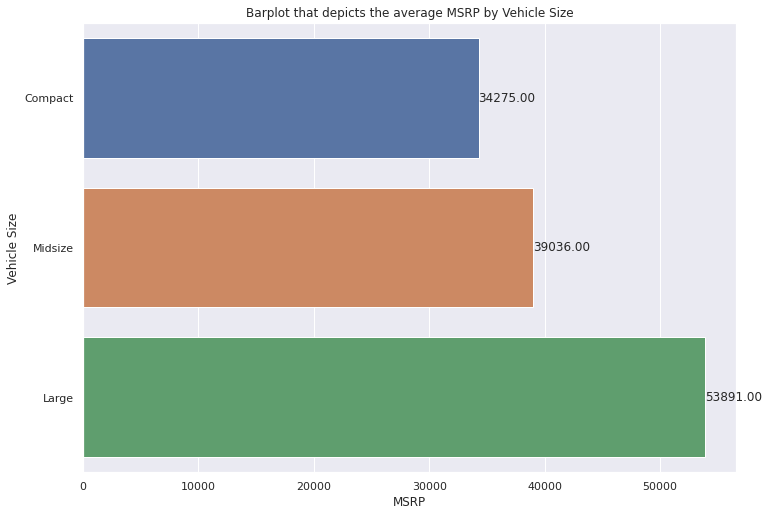

In [71]:
splot = sns.barplot(y = vehicle_size['Vehicle Size'], x = vehicle_size['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Vehicle Size')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

In short, on average, Large Vehicles cost the most amongst all vehicle style categories, while compact vehicles cost the least amongst all vehicle style categories.

## Segment MSRP by Engine Fuel Type

In [12]:
engine_fuel_type = visualization_pipeline('Engine Fuel Type', 'MSRP', np.mean)
engine_fuel_type

,Engine Fuel Type,MSRP,Count,Percentage% Breakup
9,regular unleaded,23014,7172,0.602132
1,premium unleaded (required),101627,2009,0.168668
4,premium unleaded (recommended),40813,1523,0.127865
7,flex-fuel (unleaded/E85),36258,899,0.075476
5,diesel,40788,154,0.012929
3,electric,47943,66,0.005541
0,flex-fuel (premium unleaded required/E85),159429,54,0.004534
2,flex-fuel (premium unleaded recommended/E85),48642,26,0.002183
6,flex-fuel (unleaded/natural gas),39194,6,0.000504
8,natural gas,28065,2,0.000168


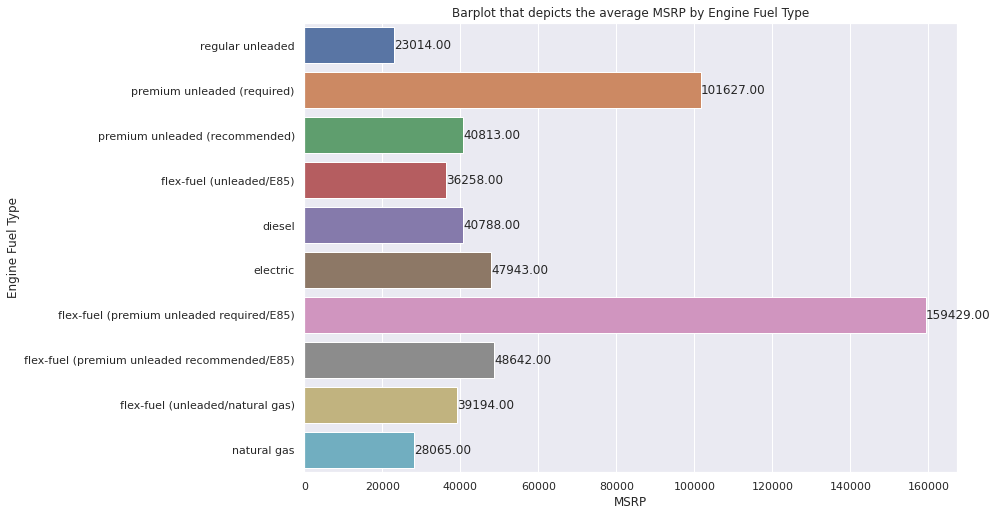

In [13]:
splot = sns.barplot(y = engine_fuel_type['Engine Fuel Type'], x = engine_fuel_type['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Engine Fuel Type')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

Flex-fuel vehicles cost the most on average, with an average MSRP of 159429. On the other hand, the Regular Unleaded vehicles cost the least on average, with an average MSRP of 23014. It is important to note that the majority of vehicles are associated with the regular unleaded fuel type, as the barplot is sorted in descending order of vehicles in each category.

## Segment MSRP by Engine Cylinders

In [14]:
engine_cylinders = visualization_pipeline('Engine Cylinders', 'MSRP', np.mean)
engine_cylinders['Engine Cylinders'] = engine_cylinders['Engine Cylinders'].astype(str)

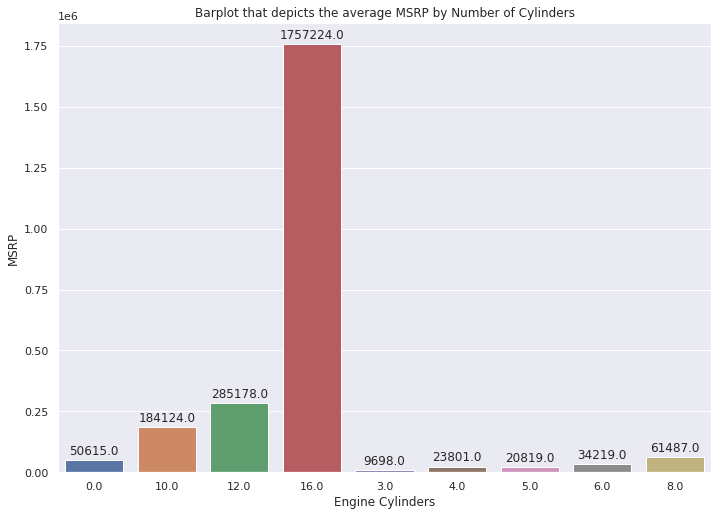

In [15]:
splot = sns.barplot(x = engine_cylinders['Engine Cylinders'], y = engine_cylinders['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Number of Cylinders')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')  

Vehicles with 16 cylinders cost the most, with an average MSRP of 1,757,223 which appears to be much larger than the average MSRPs associated with other cylinder categories. It is possible that the 16 cylinders is associated with a specific vehicle model, let's just say, a Bugatti Veyron for instance. On the other hand, vehicles with 3 cylinders cost the least, with an average MSRP of 9,698. It is possible that 3 cylinder vehicles may be older, and as a result cost less on average.

## Segment MSRP by Transmission Type

In [16]:
transmission_type = visualization_pipeline('Transmission Type', 'MSRP', np.mean)
transmission_type

,Transmission Type,MSRP,Count,Percentage% Breakup
2,AUTOMATIC,41110,8266,0.693806
3,MANUAL,26664,2935,0.246349
0,AUTOMATED_MANUAL,99508,626,0.052543
1,DIRECT_DRIVE,47351,68,0.005708
4,UNKNOWN,3041,19,0.001595


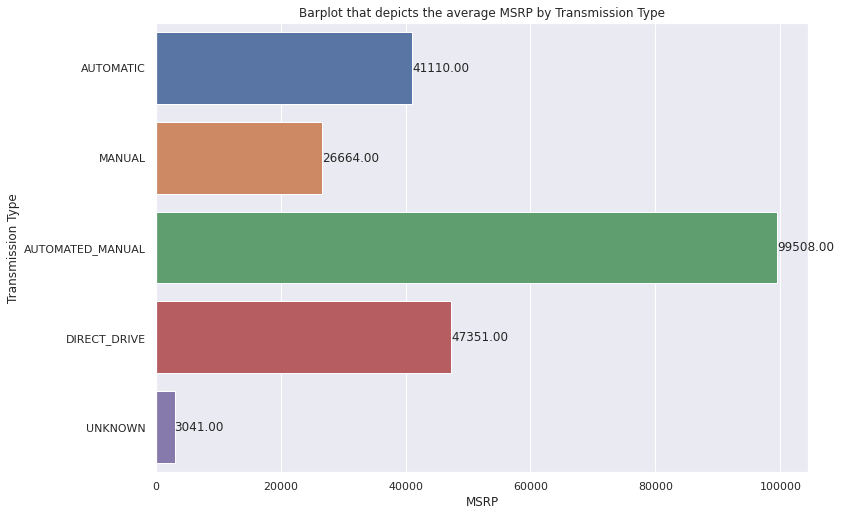

In [17]:
splot = sns.barplot(y = transmission_type['Transmission Type'], x = transmission_type['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Transmission Type')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

Vehicles with automated manual transmissions cost the most on average, with an average MSRP of 99508. On the other hand, vehicles with unknown transmission types cost the least on average, with an average MSRP of 3,040. 

## Segment MSRP by Number of Doors

In [18]:
number_of_doors = visualization_pipeline('Number of Doors', 'MSRP', np.mean)
number_of_doors

,Number of Doors,MSRP,Count,Percentage% Breakup
1,4.0,36295,8353,0.701461
0,2.0,54556,3160,0.265368
2,3.0,18624,395,0.033171


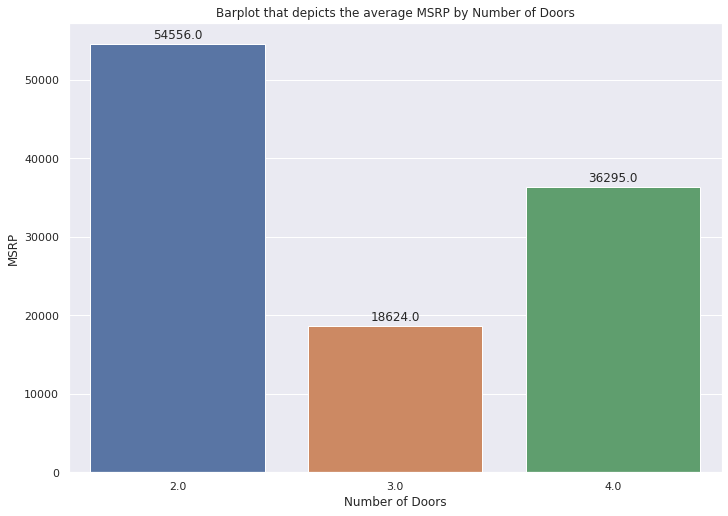

In [19]:
splot = sns.barplot(x = number_of_doors['Number of Doors'], y = number_of_doors['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Number of Doors')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')  

Cars with two doors cost the most on average, with an average MSRP of 54,556. On the other hand, cars with three doors cost the least on average, with an average MSRP of 18623.7. Based on domain knowledge in the automotive industry, cars with two doors are typically sports cars and coupes which tend to cost more on average, relative to other car styles. Additionally, three door cars aren't as common in today's market, so they may be associated with older vehicles, hence a relatively lower average price. However, more investigation is needed to determine this definitively.

Let's do a deeper dive in the cars that have only three doors.

In [20]:
#Cars which have three doors
three_doors = cars.loc[cars['Number of Doors'] == 3, :]
three_doors = three_doors.sort_values('Year', ascending = False)
print("Median selling year for three door cars. ", np.median(three_doors['Year']))
other_doors = cars.loc[cars['Number of Doors'] != 3, :]
print("Median selling year for all door cars. ", np.median(other_doors['Year']))

# doors = ['Three Doors', 'Other Doors']
# years = [np.median(three_doors['Year']), np.median(other_doors['Year'])]
# doors_analysis = pd.DataFrame({
#     'Number of Doors': doors,
#     'Median Year': years
# })
# doors_analysis

print("Difference in median selling year, ", abs(np.median(three_doors['Year']) - np.median(other_doors['Year']) ))

Median selling year for three door cars.  2003.0
Median selling year for all door cars.  2015.0
Difference in median selling year,  12.0


Essentially, the median selling year for three door cars is statistically significantly lower than the median selling year for all door cars. This explains why the average MSRP for three door cars is lower than the average selling MSRP for two door cars, and four door cars respectively, and that is specifically because three door cars tend to be older than others.

## Segment MSRP by Driven Wheels

In [21]:
driven_wheels = visualization_pipeline('Driven_Wheels', 'MSRP', np.median)
driven_wheels

,Driven_Wheels,MSRP,Count,Percentage% Breakup
3,front wheel drive,23845,4787,0.401796
1,rear wheel drive,35350,3371,0.282944
0,all wheel drive,41275,2353,0.197499
2,four wheel drive,33060,1403,0.117761


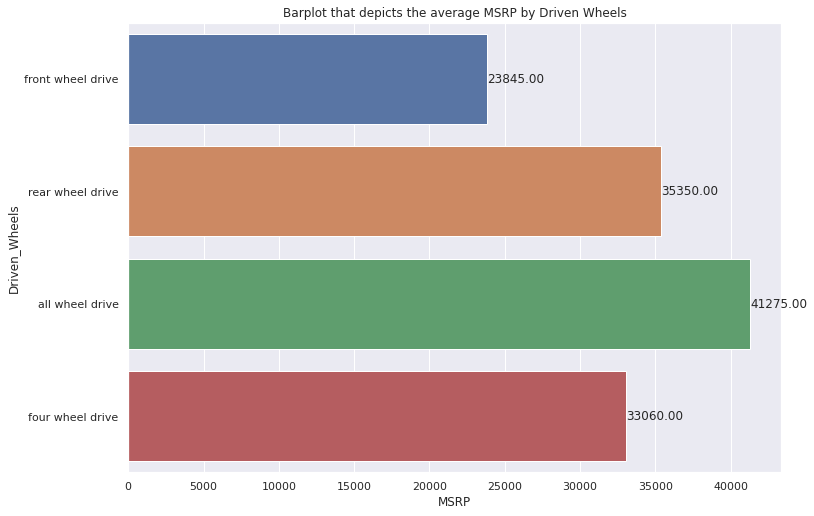

In [22]:
splot = sns.barplot(y = driven_wheels['Driven_Wheels'], x = driven_wheels['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Driven Wheels')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


All wheel drive cars cost the most on average, with an average MSRP of 58,694. On the other hand, front wheel drive cars cost the least on average, with an average MSRP of 23,057.

## Segment MSRP by Luxury and Not Luxury Cars

In [23]:
#Let's analyze this list column
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [24]:
def obtain_luxury(cat):
    if 'luxury' in cat.lower() and 'performance' not in cat.lower():
        return 'Luxury'
    elif 'luxury' not in cat.lower() and 'performance' in cat.lower():
        return 'Performance'
    elif 'luxury' in cat.lower() and 'performance' in cat.lower():
        return 'Luxury and Performance'
    else:
        return 'Not Luxury nor Performance'

cars['Luxury Level'] = cars['Market Category'].astype(str).apply(obtain_luxury)
cars['Luxury Level'].value_counts()

Not Luxury nor Performance    6868
Performance                   1758
Luxury and Performance        1743
Luxury                        1545
Name: Luxury Level, dtype: int64

In [25]:
msrp_by_luxury = cars[['Luxury Level', 'MSRP']].groupby('Luxury Level', as_index = False).agg(np.mean)
msrp_by_luxury

,Luxury Level,MSRP
0,Luxury,40393.078317
1,Luxury and Performance,83709.696500
2,Not Luxury nor Performance,23614.972918
3,Performance,64359.929465


Clearly, the average MSRP for luxury cars is statistically significantly higher than the average MSRP for non-luxurious cars.

In [26]:
luxury = visualization_pipeline('Luxury Level', 'MSRP', np.mean)
luxury

,Luxury Level,MSRP,Count,Percentage% Breakup
3,Not Luxury nor Performance,23615,6868,0.576465
1,Performance,64360,1758,0.147557
0,Luxury and Performance,83710,1743,0.146298
2,Luxury,40393,1545,0.129679


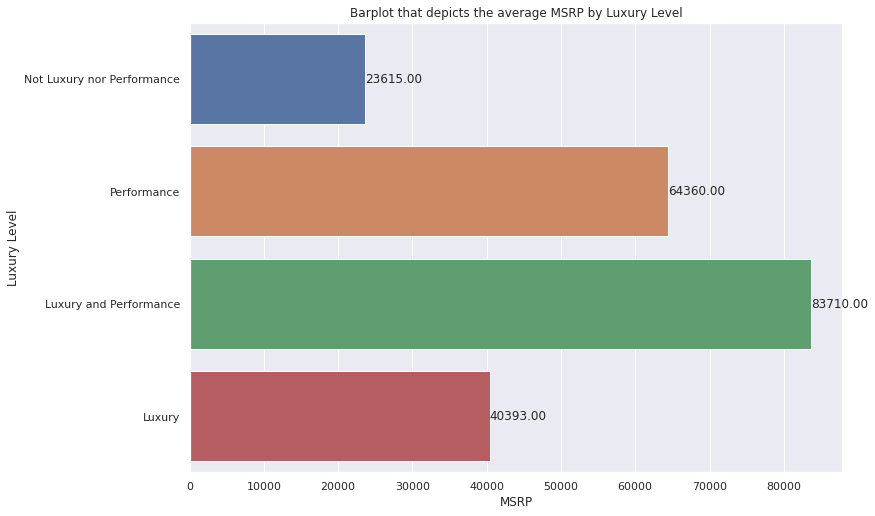

In [27]:
splot = sns.barplot(y = luxury['Luxury Level'], x = luxury['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Luxury Level')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment



This barplot depicts that the average MSRP for Luxury and Performance cars is statistically significantly higher than the average MSRP for non-luxorious and non-performance cars. This is what we would expect, since the ancillary features that luxury cars offer, as well as the powerful performance based engines add a hefty margin to their respective price tags. In short, this tells us that Luxury and Performance are important features in predicting car prices, as their incidence is directly proportional to MSRP. 

## Segment MSRP Vehicle Style

In [28]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Luxury Level
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Luxury and Performance
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury and Performance
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury and Performance
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury and Performance
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury


In [29]:
# cars = cars.drop(columns = ['Luxury'])
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Luxury Level
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Luxury and Performance
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury and Performance
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury and Performance
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury and Performance
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury


In [30]:
cars['Vehicle Style'].value_counts().sort_values(ascending = False).to_frame().reset_index()

,index,Vehicle Style
0,Sedan,3048
1,4dr SUV,2488
2,Coupe,1211
3,Convertible,793
4,4dr Hatchback,702
5,Crew Cab Pickup,681
6,Extended Cab Pickup,623
7,Wagon,592
8,2dr Hatchback,506
9,Passenger Minivan,417


In [31]:
def get_unique_vehicle_type(cars):
    if 'sedan' in cars.lower():
        return 'Sedan'
    if 'coupe' in cars.lower():
        return 'Coupe'
    if 'convertible' in cars.lower():
        return 'Convertible'
    if 'hatchback' in cars.lower():
        return 'Hatchback'
    if 'pickup' in cars.lower():
        return 'Wagon'
    if 'minivan' in cars.lower():
        return 'Minivan'
    if 'suv' in cars.lower():
        return 'SUV'
    if 'wagon' in cars.lower():
        return 'Wagon'
    
cars['Unique Vehicle Style'] = cars['Vehicle Style'].apply(get_unique_vehicle_type)
cars['Unique Vehicle Style'].value_counts()

Sedan          3048
SUV            2626
Wagon          2288
Coupe          1211
Hatchback      1208
Convertible     822
Minivan         488
Name: Unique Vehicle Style, dtype: int64

In [32]:
unique_vehicle_style = cars[['Unique Vehicle Style', 'MSRP']].groupby('Unique Vehicle Style', as_index = False).agg(np.mean)
unique_vehicle_style = unique_vehicle_style.sort_values('MSRP', ascending = False)
unique_vehicle_style

,Unique Vehicle Style,MSRP
0,Convertible,81867.588808
1,Coupe,76248.322048
5,Sedan,39270.689633
4,SUV,38829.212871
6,Wagon,26547.989510
3,Minivan,24937.229508
2,Hatchback,20094.793874


In [33]:
unique_vehicle_style = visualization_pipeline('Unique Vehicle Style', 'MSRP', np.mean)
unique_vehicle_style

,Unique Vehicle Style,MSRP,Count,Percentage% Breakup
2,Sedan,39271,3048,0.260713
3,SUV,38829,2626,0.224617
4,Wagon,26548,2288,0.195706
1,Coupe,76248,1211,0.103584
6,Hatchback,20095,1208,0.103327
0,Convertible,81868,822,0.070310
5,Minivan,24937,488,0.041742


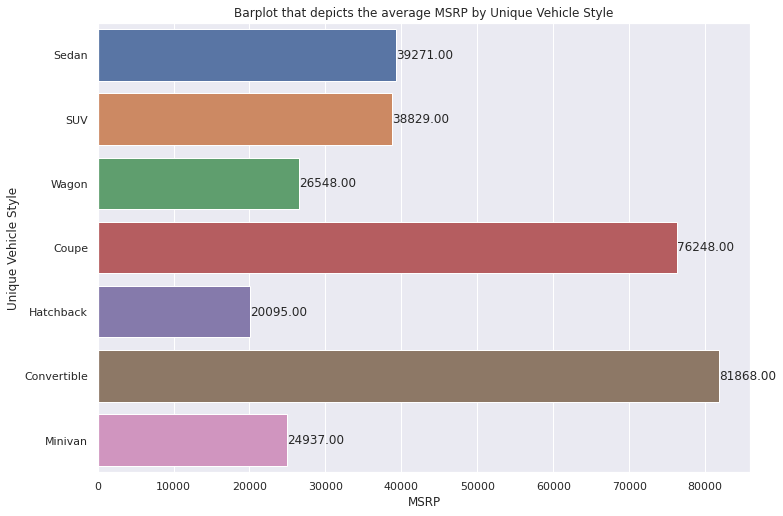

In [34]:
splot = sns.barplot(y = unique_vehicle_style['Unique Vehicle Style'], x = unique_vehicle_style['MSRP'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Unique Vehicle Style')
for p in splot.patches:
    width = p.get_width()    # get bar length
    splot.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


In short, coupes cost the most on average, with an average MSRP of 81868. On the other hand, the Hatchbacks cost the least on average, with an average MSRP of 20095. This bars are sorted in descending order of incidence, meaning that Sedans are the most common cars sold.

## Segment MSRP by Unique Vehicle Style, and Luxury Level

In [35]:
unique_vehicle_style_lux_level = cars[['Unique Vehicle Style', 'Luxury Level', 'MSRP']].groupby(['Unique Vehicle Style', 'Luxury Level'], as_index = False).agg(np.mean)
unique_vehicle_style_lux_level['MSRP'] = unique_vehicle_style_lux_level['MSRP'].apply(lambda x: round(x))
unique_vehicle_style_lux_level

,Unique Vehicle Style,Luxury Level,MSRP
0,Convertible,Luxury,47623
1,Convertible,Luxury and Performance,122498
2,Convertible,Not Luxury nor Performance,22268
3,Convertible,Performance,90670
4,Coupe,Luxury,23981
5,Coupe,Luxury and Performance,92537
6,Coupe,Not Luxury nor Performance,12757
7,Coupe,Performance,102469
8,Hatchback,Luxury,27014
9,Hatchback,Luxury and Performance,21469


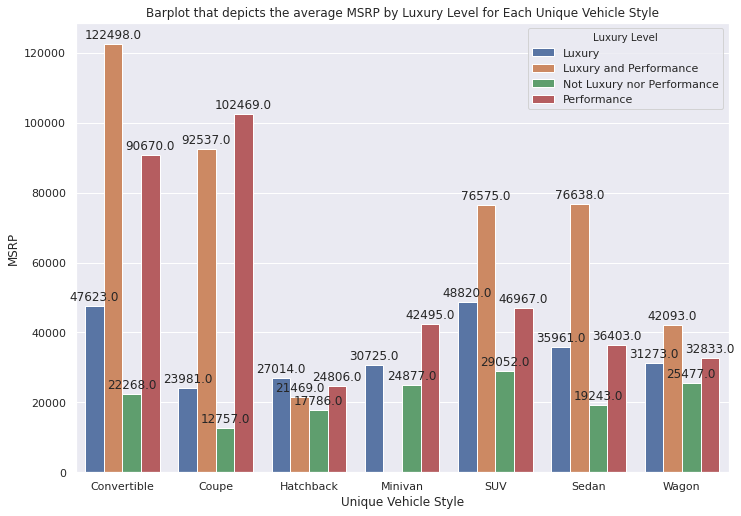

In [36]:
splot = sns.barplot(x = unique_vehicle_style_lux_level['Unique Vehicle Style'], y = unique_vehicle_style_lux_level['MSRP'], hue = unique_vehicle_style_lux_level['Luxury Level'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Barplot that depicts the average MSRP by Luxury Level for Each Unique Vehicle Style')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 



Consistently, for each and every one of the unique vehicle styles, the average MSRP for Performance and Luxury cars is statistically significantly higher than that of the other Luxury Levels. Hence, the summarized trend above is exibited at a lower granularity as well.

## Function to Remove Outliers

In [37]:
def remove_outliers(table, quant_col):
    upper_bound = table.loc['75%'] + 1.5*(table.loc['75%'] - table.loc['50%'])
    lower_bound = table.loc['25%'] - 1.5*(table.loc['75%'] - table.loc['50%'])
    wout_outliers = cars.loc[(cars[quant_col] <= upper_bound) & (cars['MSRP'] >= lower_bound), :]
    return wout_outliers



## Lineplot to describe the association between model year and msrp.

In [38]:
#Consider the trend for years beginning 1997, as there doesn't appear to be sufficient data to depict a trend for years prior
msrp_by_year = cars[['Year', 'MSRP']].groupby('Year', as_index = False).agg(np.median)
msrp_by_year = msrp_by_year.sort_values('Year', ascending = True).iloc[7:, :]
msrp_by_year

,Year,MSRP
7,1997,2178.0
8,1998,2654.0
9,1999,2800.0
10,2000,2526.0
11,2001,22767.5
12,2002,23055.0
13,2003,24547.5
14,2004,25160.0
15,2005,26099.0
16,2006,27250.0


Text(0.5, 1.0, 'Lineplot that depicts the association between Year and Median MSRP')

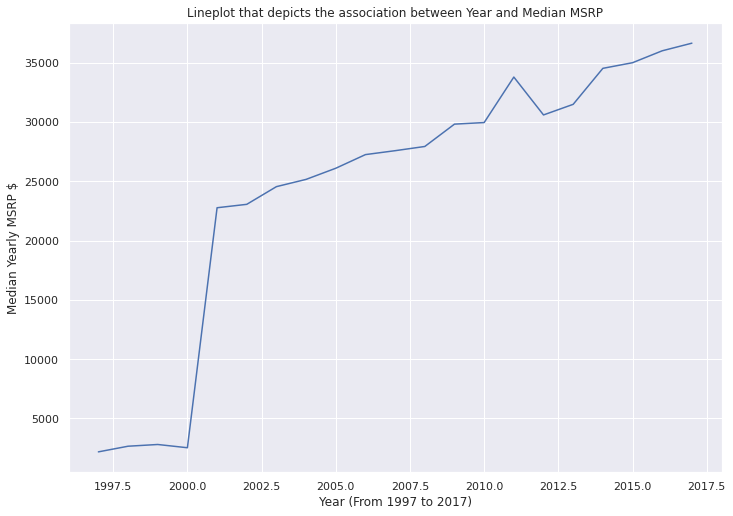

In [39]:
sns.lineplot(msrp_by_year['Year'], msrp_by_year['MSRP'])
plt.xlabel('Year (From 1997 to 2017)')
plt.ylabel('Median Yearly MSRP $')
plt.title('Lineplot that depicts the association between Year and Median MSRP')

Although heteroskedacity is exhibited (inconistency of variability of points on the scatterplot), there appears to be a positive linear association between average yearly MSRP and Time.

## Scatterplot to describe the association between horsepower and msrp.

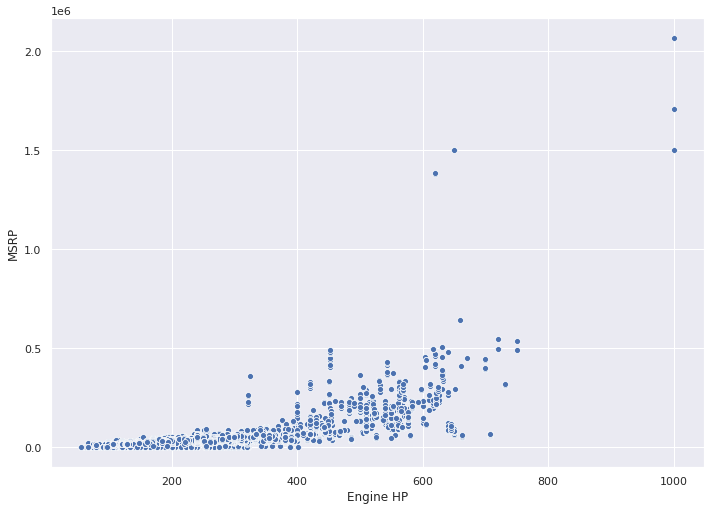

In [40]:
#Let's remove a couple of outliers
sns.scatterplot(cars['Engine HP'], cars['MSRP'])

In [41]:
#Let's remove a couple of outliers (associated with very large MSRP prices to better visualize the trend)
msrp_summary_stats = cars['MSRP'].describe()
msrp_summary_stats

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

Text(0.5, 1.0, 'Scatterplot that depicts the association between MSRP and Engine HP')

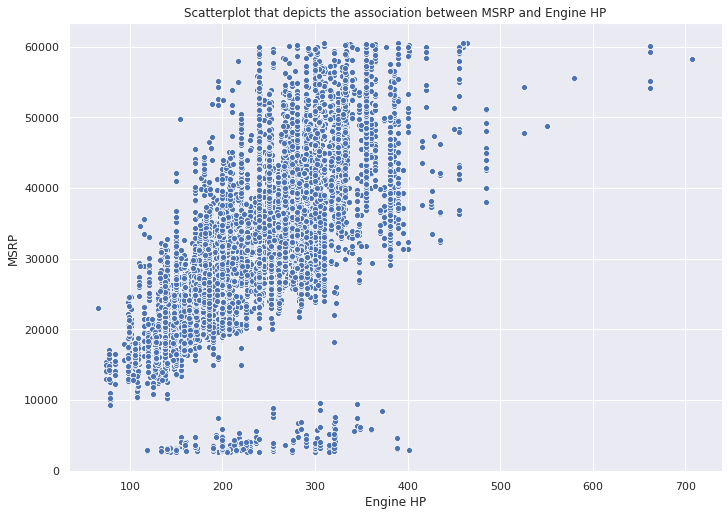

In [42]:
cars_wout_outliers = remove_outliers(msrp_summary_stats, 'MSRP')
sns.scatterplot(cars_wout_outliers['Engine HP'], cars_wout_outliers['MSRP'])
plt.title('Scatterplot that depicts the association between MSRP and Engine HP')

Clearly, there is a positive linear association between MSRP and Engine HP. However, there is a little heteroskedacity based funneling depicted. Particularly, variability in the dependent variable (MSRP) is directly proportional to the magnitude of the independent variable (Engine HP). 

## Scatterplot to describe the association between mpg and msrp.

In [43]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Luxury Level,Unique Vehicle Style
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Luxury and Performance,Coupe
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury and Performance,Convertible
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury and Performance,Coupe
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury and Performance,Coupe
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,Convertible


### Association between city mpg and msrp

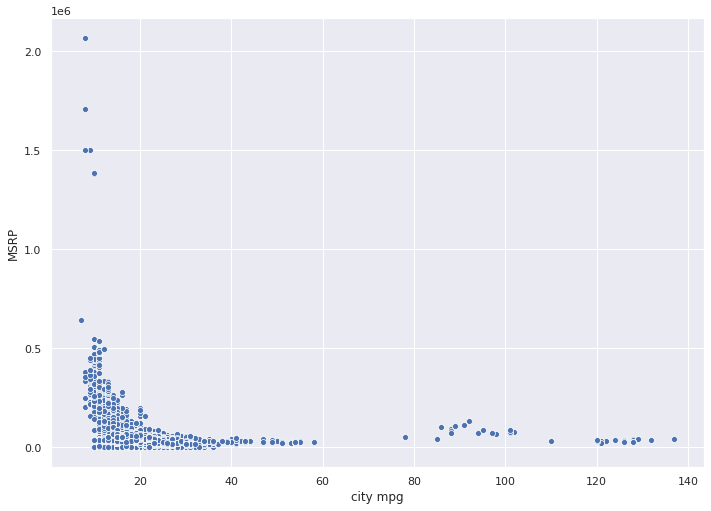

In [44]:
sns.scatterplot(cars['city mpg'], cars['MSRP'])

Let's remove outliers of MSRP to depict a clearer association.

In [45]:
mpg_city_summary_stats = cars['MSRP'].describe()
mpg_city_wout_outliers = remove_outliers(mpg_city_summary_stats, 'MSRP')
mpg_city_wout_outliers = mpg_city_wout_outliers.loc[mpg_city_wout_outliers['city mpg'] < max(mpg_city_wout_outliers['city mpg']), :]
mpg_city_wout_outliers

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Luxury Level,Unique Vehicle Style
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Luxury and Performance,Coupe
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury and Performance,Convertible
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury and Performance,Coupe
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury and Performance,Coupe
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,Luxury,Hatchback
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,Luxury,Hatchback
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,Luxury,Hatchback
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,Luxury,Hatchback


Text(0.5, 1.0, 'Scatterplot that depicts the association between MSRP and city mpg')

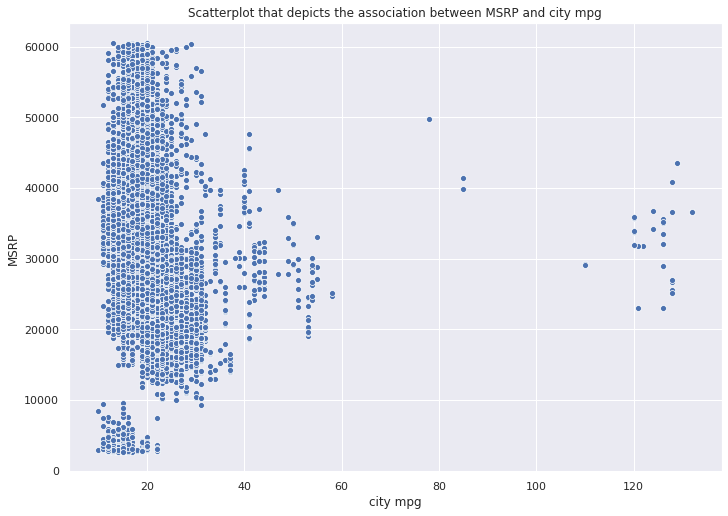

In [46]:
sns.scatterplot(mpg_city_wout_outliers['city mpg'], mpg_city_wout_outliers['MSRP'])
plt.title('Scatterplot that depicts the association between MSRP and city mpg')

There doesn't appear to be a clear association between city mpg and MSRP. However, heteroskedacity is exhibited, which is inconsistent variability of points on the scatterplot. Basically, for smaller values of city mpg, there is larger variability in MSRP, as both cheap cars and expensive cars can have sub-par fuel economy (sports cars typically don't factor in fuel economy so as to not compromise performance). However, for larger values of city MPG, there is less variability and greater consistency in MSRP values. In short, variability in MSRP is inversely proportional to the magnitude of city mpg.

### association between highway mpg and msrp

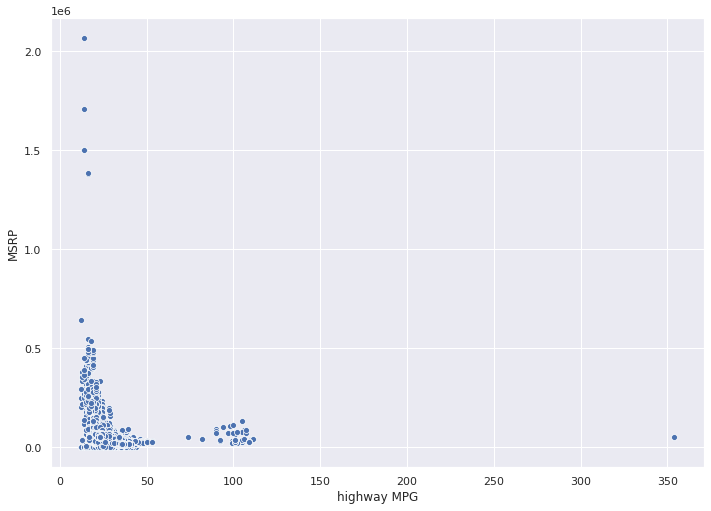

In [47]:
sns.scatterplot(cars['highway MPG'], cars['MSRP'])

Let's remove the outliers to more clearly depict the association.

In [48]:
mpg_highway_summary_stats = cars['MSRP'].describe()
mpg_highway_wout_outliers = remove_outliers(mpg_highway_summary_stats, 'MSRP')
mpg_highway_wout_outliers = mpg_highway_wout_outliers.loc[mpg_highway_wout_outliers['highway MPG'] < max(mpg_highway_wout_outliers['highway MPG']), :]
mpg_highway_wout_outliers

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Luxury Level,Unique Vehicle Style
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Luxury and Performance,Coupe
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury and Performance,Convertible
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury and Performance,Coupe
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury and Performance,Coupe
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,Luxury,Hatchback
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,Luxury,Hatchback
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,Luxury,Hatchback
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,Luxury,Hatchback


Text(0.5, 1.0, 'Scatterplot that depicts the association between MSRP and highway MPG')

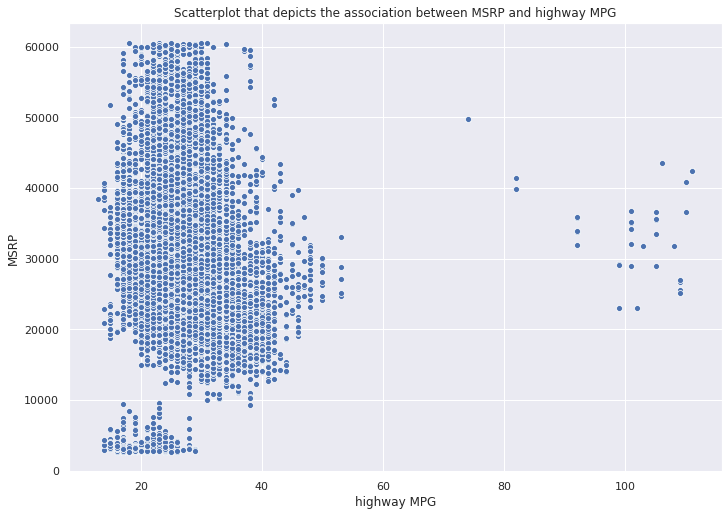

In [49]:
sns.scatterplot(mpg_highway_wout_outliers['highway MPG'], mpg_highway_wout_outliers['MSRP'])
plt.title('Scatterplot that depicts the association between MSRP and highway MPG')

There doesn't appear to be a clear association between highway mpg and MSRP. However, heteroskedacity is exhibited, which is inconsistent variability of points on the scatterplot. Basically, for smaller values of highway mpg, there is larger variability in MSRP, as both cheap cars and expensive cars can have sub-par fuel economy (sports cars typically don't factor in fuel economy so as to not compromise performance). However, for larger values of highway MPG, there is less variability and greater consistency in MSRP values. In short, variability in MSRP is inversely proportional to the magnitude of highway mpg.

# Model Development Phase

## Data Cleaning Phase

Check for null values.

In [50]:
cars.isnull().sum().sort_values(ascending = False)

Market Category         3742
Unique Vehicle Style     223
Engine HP                 69
Engine Cylinders          30
Number of Doors            6
Engine Fuel Type           3
highway MPG                0
Vehicle Style              0
Vehicle Size               0
city mpg                   0
Luxury Level               0
Driven_Wheels              0
Transmission Type          0
Popularity                 0
MSRP                       0
Year                       0
Model                      0
Make                       0
dtype: int64

It is most appropriate to impute these quantitative null values with the median, so as to not introduce metrics that are not representative(i.e. mean is skewed in the direction of the tail).

In [51]:
def impute_quant_columns(cars, columns):
    for col in columns:
        cars.loc[cars[col].isnull(), col] = np.median(cars.loc[~cars[col].isnull(), col])
    return cars
cars = impute_quant_columns(cars, ['Number of Doors', 'Engine HP', 'Engine Cylinders'])
cars.isnull().sum().sort_values(ascending = False)

Market Category         3742
Unique Vehicle Style     223
Engine Fuel Type           3
Driven_Wheels              0
Model                      0
Year                       0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Number of Doors            0
Luxury Level               0
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Make                       0
dtype: int64

Let's now remove unnecessary columns, change variable types, and impute the categorical columns.

In [52]:
cars.head()
#Firstly, let's remove the Make, Model, Market Category, and Vehicle Style Features

cars = cars.drop(columns = ['Make', 'Model', 'Market Category', 'Vehicle Style'])
cars.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Luxury Level,Unique Vehicle Style
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,3916,46135,Luxury and Performance,Coupe
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,3916,40650,Luxury and Performance,Convertible
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,3916,36350,Luxury and Performance,Coupe
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,3916,29450,Luxury and Performance,Coupe
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,3916,34500,Luxury,Convertible


In [53]:
#Let's convert the Engine Cylinders Feature, and the Number of Doors Feature to type string for one-hot encoding
cars['Engine Cylinders'] = cars['Engine Cylinders'].astype(str)
cars['Number of Doors'] = cars['Number of Doors'].astype(str)

In [54]:
cars.isnull().sum().sort_values(ascending = False)

Unique Vehicle Style    223
Engine Fuel Type          3
Luxury Level              0
MSRP                      0
Popularity                0
city mpg                  0
highway MPG               0
Vehicle Size              0
Number of Doors           0
Driven_Wheels             0
Transmission Type         0
Engine Cylinders          0
Engine HP                 0
Year                      0
dtype: int64

Let's now visualize the most common category amongst the two categorical columns respectively

In [55]:
cars['Unique Vehicle Style'].value_counts()

Sedan          3048
SUV            2626
Wagon          2288
Coupe          1211
Hatchback      1208
Convertible     822
Minivan         488
Name: Unique Vehicle Style, dtype: int64

In [56]:
cars['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [57]:
cars.loc[cars['Unique Vehicle Style'].isnull(), 'Unique Vehicle Style'] = 'Sedan'
cars.loc[cars['Engine Fuel Type'].isnull(), 'Engine Fuel Type'] = 'regular unleaded'
cars.isnull().sum().sort_values(ascending = False)

Unique Vehicle Style    0
Luxury Level            0
MSRP                    0
Popularity              0
city mpg                0
highway MPG             0
Vehicle Size            0
Number of Doors         0
Driven_Wheels           0
Transmission Type       0
Engine Cylinders        0
Engine HP               0
Engine Fuel Type        0
Year                    0
dtype: int64

In [58]:
cars = cars.drop(columns = ['Popularity'])
cars

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,MSRP,Luxury Level,Unique Vehicle Style
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135,Luxury and Performance,Coupe
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650,Luxury and Performance,Convertible
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350,Luxury and Performance,Coupe
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450,Luxury and Performance,Coupe
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500,Luxury,Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,46120,Luxury,Hatchback
11910,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,56670,Luxury,Hatchback
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50620,Luxury,Hatchback
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50920,Luxury,Hatchback


In [59]:
#Remove outliers
values = cars['MSRP'].describe()
cars = remove_outliers(values, 'MSRP')
cars

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,city mpg,MSRP,Luxury Level,Unique Vehicle Style
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135,Luxury and Performance,Coupe
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650,Luxury and Performance,Convertible
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350,Luxury and Performance,Coupe
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450,Luxury and Performance,Coupe
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500,Luxury,Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,46120,Luxury,Hatchback
11910,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,56670,Luxury,Hatchback
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50620,Luxury,Hatchback
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50920,Luxury,Hatchback


## Feature Engineering Phase

One hot encode the categorical features

In [60]:
cars = pd.get_dummies(cars)
cars.head()

,Year,Engine HP,highway MPG,city mpg,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),...,Luxury Level_Luxury and Performance,Luxury Level_Not Luxury nor Performance,Luxury Level_Performance,Unique Vehicle Style_Convertible,Unique Vehicle Style_Coupe,Unique Vehicle Style_Hatchback,Unique Vehicle Style_Minivan,Unique Vehicle Style_SUV,Unique Vehicle Style_Sedan,Unique Vehicle Style_Wagon
0,2011,335.0,26,19,46135,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2011,300.0,28,19,40650,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2011,300.0,28,20,36350,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2011,230.0,28,18,29450,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2011,230.0,28,18,34500,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Development

Train-Test-Split (2/3 training 1/3 testing)

For L1 and L2 regularization, it is really important to standardize to ensure that the coefficients alpha are not too large or too small during the contrained optimization process(we may end up underfitting the model too much)

In [61]:
y = cars['MSRP']
X = cars.drop(columns = ['MSRP'])
X = (X - np.mean(X))/np.std(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,Year,Engine HP,highway MPG,city mpg,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),Engine Fuel Type_natural gas,...,Luxury Level_Luxury and Performance,Luxury Level_Not Luxury nor Performance,Luxury Level_Performance,Unique Vehicle Style_Convertible,Unique Vehicle Style_Coupe,Unique Vehicle Style_Hatchback,Unique Vehicle Style_Minivan,Unique Vehicle Style_SUV,Unique Vehicle Style_Sedan,Unique Vehicle Style_Wagon
1609,0.906834,0.489204,0.269678,0.042224,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,-0.555598,1.657789,-0.526848
3625,0.717745,0.831082,-0.067493,-0.174849,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,-1.324036,2.442361,-0.235052,-0.277756,-0.353986,-0.216408,1.799862,-0.603213,-0.526848
5979,0.717745,0.311427,-0.179883,-0.174849,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,3.125736,-1.324036,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,-0.555598,1.657789,-0.526848
10188,0.717745,0.625955,-0.517053,-0.283386,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,-0.555598,-0.603213,1.898079
11716,-0.794969,0.270402,-0.629444,-0.608995,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,1.799862,-0.603213,-0.526848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.906834,-0.850958,0.719238,0.259297,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,-0.555598,1.657789,-0.526848
6784,0.906834,0.790056,-0.179883,-0.283386,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,-1.324036,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,1.799862,-0.603213,-0.526848
7036,0.717745,0.379803,0.044897,0.042224,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,1.799862,-0.603213,-0.526848
1305,-1.362237,-1.056085,-0.179883,0.042224,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,-0.014756,...,-0.319925,0.755266,-0.409440,-0.235052,-0.277756,-0.353986,-0.216408,-0.555598,-0.603213,1.898079


In [62]:
#Create a model dictionary without hypertuning
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge()}

In [63]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [64]:
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual-predicted)**2))

def k_fold_cross_validation_accuracy(model, X_train, Y_train, k):
    size_of_split = round(100/k)/100
    curr_split_index = 0
    accuracies = []
    fold = 0
    x_train = 0
    y_train = 0
    x_val = 0
    y_val = 0
    X_train = X_train.reset_index()
    Y_train = Y_train.to_frame().reset_index()
    for i in range(k):
        x_val = X_train.iloc[curr_split_index: curr_split_index + round(size_of_split*len(X_train)), :]
        y_val = Y_train.iloc[curr_split_index: curr_split_index + round(size_of_split*len(X_train)), :]
        x_train = X_train.loc[~X_train['index'].isin(x_val['index']), :]
        y_train = Y_train.loc[~Y_train['index'].isin(y_val['index']), :]
        y_train = y_train.iloc[:, 1]
        y_val = y_val.iloc[:, 1]
        model.fit(x_train, y_train)
        accuracies.append(rmse(model.predict(x_val), y_val))
        curr_split_index = curr_split_index + round(size_of_split*len(X_train))
    return np.mean(accuracies)
        
        
    
def evaluate_performance_of_models(models, X_train, y_train):
    training_accuracy = []
    cross_validation_accuracy = []
    for model in list(models.keys()):
        models[model].fit(X_train, y_train)
        training_accuracy.append(rmse(models[model].predict(X_train), y_train))
        cross_validation_accuracy.append(k_fold_cross_validation_accuracy(models[model], X_train, y_train, 5))
    return training_accuracy, cross_validation_accuracy
        
training_accuracies, cross_validation_accuracies = evaluate_performance_of_models(models, X_train, y_train)
training_accuracies, cross_validation_accuracies
        

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029021703.9624634, tolerance: 82785588.5080199
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1639468162.230194, tolerance: 66631459.42103385
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1598377872.961563, tolerance: 66831424.07857475
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5582918098.6

([5444.828872204875, 5444.85755092674, 5444.846437084266],
 [5493.19954434686, 5493.150477544389, 5493.160690927582])

In [65]:
accuracies_dataframe = pd.DataFrame({
    'Training RMSE': training_accuracies,
    '5-Fold Cross Validation RMSE': cross_validation_accuracies
    
})
accuracies_dataframe = accuracies_dataframe.reset_index()
accuracies_dataframe

,index,Training RMSE,5-Fold Cross Validation RMSE
0,0,5444.828872,5493.199544
1,1,5444.857551,5493.150478
2,2,5444.846437,5493.160691


In [66]:
accuracies_dataframe.iloc[0, 0] = 'OLS'
accuracies_dataframe.iloc[1, 0] = 'Lasso'
accuracies_dataframe.iloc[2, 0] = 'Ridge'
accuracies_dataframe = accuracies_dataframe.rename(columns = {'index':'Model Type'})
accuracies_dataframe

,Model Type,Training RMSE,5-Fold Cross Validation RMSE
0,OLS,5444.828872,5493.199544
1,Lasso,5444.857551,5493.150478
2,Ridge,5444.846437,5493.160691


On average, the lasso regression model performed the best on average on the 5-Folds, with an RMSE of 29276.730959. Hence, Lasso regression is the best model.

In [67]:
lasso_params = {'alpha':[0.03, 0.04, 0.05, 0.06, 0.07, 0.08]}
GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5072198952.060364, tolerance: 66631459.42103385
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4994610388.657623, tolerance: 66831424.07857475
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5104743893.498642, tolerance: 66266577.59489576
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5144587486.2

Lasso(alpha=0.07)

In [68]:
lasso = linear_model.Lasso(alpha = 0.07)
lasso.fit(X_train, y_train)
print("Performance of lasso regression model on the test set: ", rmse(lasso.predict(X_test), y_test))

Performance of lasso regression model on the test set:  5718.5855782789595


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6352786816.246201, tolerance: 82785588.5080199
  positive)


In [69]:
the_cars = (cars - np.mean(cars))/np.std(cars)
the_cars

,Year,Engine HP,highway MPG,city mpg,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),...,Luxury Level_Luxury and Performance,Luxury Level_Not Luxury nor Performance,Luxury Level_Performance,Unique Vehicle Style_Convertible,Unique Vehicle Style_Coupe,Unique Vehicle Style_Hatchback,Unique Vehicle Style_Minivan,Unique Vehicle Style_SUV,Unique Vehicle Style_Sedan,Unique Vehicle Style_Wagon
0,-0.227702,1.405437,-0.179883,-0.174849,1.311689,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,3.125736,-1.324036,-0.40944,-0.235052,3.600279,-0.353986,-0.216408,-0.555598,-0.603213,-0.526848
1,-0.227702,0.926808,0.044897,-0.174849,0.838367,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,3.125736,-1.324036,-0.40944,4.254385,-0.277756,-0.353986,-0.216408,-0.555598,-0.603213,-0.526848
2,-0.227702,0.926808,0.044897,-0.066313,0.467303,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,3.125736,-1.324036,-0.40944,-0.235052,3.600279,-0.353986,-0.216408,-0.555598,-0.603213,-0.526848
3,-0.227702,-0.030451,0.044897,-0.283386,-0.128125,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,3.125736,-1.324036,-0.40944,-0.235052,3.600279,-0.353986,-0.216408,-0.555598,-0.603213,-0.526848
4,-0.227702,-0.030451,0.044897,-0.283386,0.307660,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,-0.319925,-1.324036,-0.40944,4.254385,-0.277756,-0.353986,-0.216408,-0.555598,-0.603213,-0.526848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-0.038612,0.926808,-0.517053,-0.500459,1.310395,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,-0.319925,-1.324036,-0.40944,-0.235052,-0.277756,2.824969,-0.216408,-0.555598,-0.603213,-0.526848
11910,-0.038612,0.926808,-0.517053,-0.500459,2.220796,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,-0.319925,-1.324036,-0.40944,-0.235052,-0.277756,2.824969,-0.216408,-0.555598,-0.603213,-0.526848
11911,-0.038612,0.926808,-0.517053,-0.500459,1.698718,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,-0.319925,-1.324036,-0.40944,-0.235052,-0.277756,2.824969,-0.216408,-0.555598,-0.603213,-0.526848
11912,0.150477,0.926808,-0.517053,-0.500459,1.724606,-0.11697,-0.072472,-0.043057,-0.317646,-0.025564,...,-0.319925,-1.324036,-0.40944,-0.235052,-0.277756,2.824969,-0.216408,-0.555598,-0.603213,-0.526848


Overall, the lasso regression model with optimal hyperparameter alpha = 0.03 acheieved an rmse of 28548 on the test set for predicting car price MSRP.